In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
import sys
sys.path.append("C:/Users/Mafeus/Desktop/Git_Repos/OpenCV")
import OpCV_Utils

In [4]:
def mouse_4_points_callback_src(event, x, y, flags, param):
    
    global p1_src, p2_src, p3_src, p4_src, clicked_src, move_points_src
    
    p_radius = 10
       
    if event == cv2.EVENT_LBUTTONDOWN:
        
        if (((p1_src[0] - p_radius) < x < (p1_src[0] + p_radius)) & ((p1_src[1] - p_radius) < y < (p1_src[1] + p_radius))):
            p1_src = (x, y)
            clicked_src = True
            move_points_src = [True, False, False, False]
            
        elif (((p2_src[0] - p_radius) < x < (p2_src[0] + p_radius)) & ((p2_src[1] - p_radius) < y < (p2_src[1] + p_radius))):
            p2_src = (x, y)
            clicked_src = True
            move_points_src = [False, True, False, False]
            
        elif (((p3_src[0] - p_radius) < x < (p3_src[0] + p_radius)) & ((p3_src[1] - p_radius) < y < (p3_src[1] + p_radius))):
            p3_src = (x, y)
            clicked_src = True
            move_points_src = [False, False, True, False]
            
        elif (((p4_src[0] - p_radius) < x < (p4_src[0] + p_radius)) & ((p4_src[1] - p_radius) < y < (p4_src[1] + p_radius))):
            p4_src = (x, y)
            clicked_src = True
            move_points_src = [False, False, False, True]
    
    if clicked_src == True:
        if event == cv2.EVENT_MOUSEMOVE:
            if (move_points_src[0] == True):
                p1_src = (x, y)
            if (move_points_src[1] == True):
                p2_src = (x, y)
            if (move_points_src[2] == True):
                p3_src = (x, y)
            if (move_points_src[3] == True):
                p4_src = (x, y)
            
        if event == cv2.EVENT_LBUTTONUP:
            clicked_src = False
            move_points_src = [False, False, False, False]
            
    pass

In [5]:
def mouse_4_points_callback_dest(event, x, y, flags, param):
    
    # Aux Variables Should Start As:
    # clicked_src = False
    # move_points_src = [False, False, False, False]
    
    global p1_dest, p2_dest, p3_dest, p4_dest, clicked_dest, move_points_dest
    
    p_radius = 10
       
    if event == cv2.EVENT_LBUTTONDOWN:
        
        if (((p1_dest[0] - p_radius) < x < (p1_dest[0] + p_radius)) & ((p1_dest[1] - p_radius) < y < (p1_dest[1] + p_radius))):
            p1_dest = (x, y)
            clicked_dest = True
            move_points_dest = [True, False, False, False]
            
        elif (((p2_dest[0] - p_radius) < x < (p2_dest[0] + p_radius)) & ((p2_dest[1] - p_radius) < y < (p2_dest[1] + p_radius))):
            p2_dest = (x, y)
            clicked_dest = True
            move_points_dest = [False, True, False, False]
            
        elif (((p3_dest[0] - p_radius) < x < (p3_dest[0] + p_radius)) & ((p3_dest[1] - p_radius) < y < (p3_dest[1] + p_radius))):
            p3_dest = (x, y)
            clicked_dest = True
            move_points_dest = [False, False, True, False]
            
        elif (((p4_dest[0] - p_radius) < x < (p4_dest[0] + p_radius)) & ((p4_dest[1] - p_radius) < y < (p4_dest[1] + p_radius))):
            p4_dest = (x, y)
            clicked_dest = True
            move_points_dest = [False, False, False, True]
    
    if clicked_dest == True:
        if event == cv2.EVENT_MOUSEMOVE:
            if (move_points_dest[0] == True):
                p1_dest = (x, y)
            if (move_points_dest[1] == True):
                p2_dest = (x, y)
            if (move_points_dest[2] == True):
                p3_dest = (x, y)
            if (move_points_dest[3] == True):
                p4_dest = (x, y)
            
        if event == cv2.EVENT_LBUTTONUP:
            clicked_dest = False
            move_points_dest = [False, False, False, False]
            
    pass

In [6]:
def draw_points(image, p1, p2, p3, p4):
    
    cv2.circle(image, p1, 10, (255,0,0), thickness = 1, lineType = cv2.LINE_AA)
    cv2.circle(image, p2, 10, (255,0,0), thickness = 1, lineType = cv2.LINE_AA)
    cv2.circle(image, p3, 10, (255,0,0), thickness = 1, lineType = cv2.LINE_AA)
    cv2.circle(image, p4, 10, (255,0,0), thickness = 1, lineType = cv2.LINE_AA)

    cv2.line(image, p1, p2, (255, 0, 0), 3)
    cv2.line(image, p2, p4, (255, 0, 0), 3)
    cv2.line(image, p1, p3, (255, 0, 0), 3)
    cv2.line(image, p3, p4, (255, 0, 0), 3)
    
    cv2.circle(image, p1, 2, (0,0,255), thickness = -1, lineType = cv2.LINE_AA)
    cv2.circle(image, p2, 2, (0,0,255), thickness = -1, lineType = cv2.LINE_AA)
    cv2.circle(image, p3, 2, (0,0,255), thickness = -1, lineType = cv2.LINE_AA)
    cv2.circle(image, p4, 2, (0,0,255), thickness = -1, lineType = cv2.LINE_AA)

    pass

In [8]:
# Load Image:
image_src = cv2.imread('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV/Testing Grounds/ztest_media/cachorros.jpg')
image_src = cv2.resize(image_src, (400,300))

image_dest = cv2.imread('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV/Testing Grounds/ztest_media/cube1.png')
image_dest = cv2.resize(image_dest, (400,300))

# Starting Points:
p1_src = (image_src.shape[1]//3, image_src.shape[0]//4)
p2_src = (2*image_src.shape[1]//3, image_src.shape[0]//4)
p3_src = (image_src.shape[1]//3, 3*image_src.shape[0]//4)
p4_src = (2*image_src.shape[1]//3, 3*image_src.shape[0]//4)

p1_dest = (image_dest.shape[1]//3, image_dest.shape[0]//4)
p2_dest = (2*image_dest.shape[1]//3, image_dest.shape[0]//4)
p3_dest = (image_dest.shape[1]//3, 3*image_dest.shape[0]//4)
p4_dest = (2*image_dest.shape[1]//3, 3*image_dest.shape[0]//4)

# Mouse Detection:
cv2.namedWindow('Image Src')
cv2.setMouseCallback('Image Src', mouse_4_points_callback_src)

cv2.namedWindow('Image Dest')
cv2.setMouseCallback('Image Dest', mouse_4_points_callback_dest)

# Aux Variables:
clicked_src = False
move_points_src = [False, False, False, False]
clicked_dest = False
move_points_dest = [False, False, False, False]

while True:
    
     # Keyboard Controls:
    
    key = cv2.waitKey(1) or 0xff   
        
    if key == ord('k'):
        break
        
    if key == ord('r'):
        # Reset Points:
        p1_src = (image_src.shape[1]//3, image_src.shape[0]//4)
        p2_src = (2*image_src.shape[1]//3, image_src.shape[0]//4)
        p3_src = (image_src.shape[1]//3, 3*image_src.shape[0]//4)
        p4_src = (2*image_src.shape[1]//3, 3*image_src.shape[0]//4)
        
        p1_dest = (image_dest.shape[1]//3, image_dest.shape[0]//4)
        p2_dest = (2*image_dest.shape[1]//3, image_dest.shape[0]//4)
        p3_dest = (image_dest.shape[1]//3, 3*image_dest.shape[0]//4)
        p4_dest = (2*image_dest.shape[1]//3, 3*image_dest.shape[0]//4)
    
    # Reset Frames:
    image_src = cv2.imread('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV/Testing Grounds/ztest_media/cachorros.jpg')
    image_src = cv2.resize(image_src, (400,300))
    image_src_copy = image_src.copy()

    image_dest = cv2.imread('C:/Users/Mafeus/Desktop/Git_Repos/OpenCV/Testing Grounds/ztest_media/cube1.png')
    image_dest = cv2.resize(image_dest, (400,300))

    ##########################################################################
    draw_points(image_src, p1_src, p2_src, p3_src, p4_src)
    draw_points(image_dest, p1_dest, p2_dest, p3_dest, p4_dest)
    ##########################################################################
    
    points1 = np.array([[[p1_src[0], p1_src[1]]], [[p2_src[0], p2_src[1]]], 
                        [[p3_src[0], p3_src[1]]], [[p4_src[0], p4_src[1]]]])
    
    points2 = np.array([[[p1_dest[0], p1_dest[1]]], [[p2_dest[0], p2_dest[1]]], 
                        [[p3_dest[0], p3_dest[1]]], [[p4_dest[0], p4_dest[1]]]])
    
    img_warp = OpCV_Utils.img_homography(image_src_copy, points1, points2, pad=0)
    stack = OpCV_Utils.stack_multiple_images([[image_src, image_dest, img_warp]], sep_lines=True, scale = 1)
    
    cv2.imshow('Image Src', image_src)
    cv2.imshow('Image Dest', image_dest)
    cv2.imshow('Warped Image', img_warp)
    
cv2.destroyAllWindows()

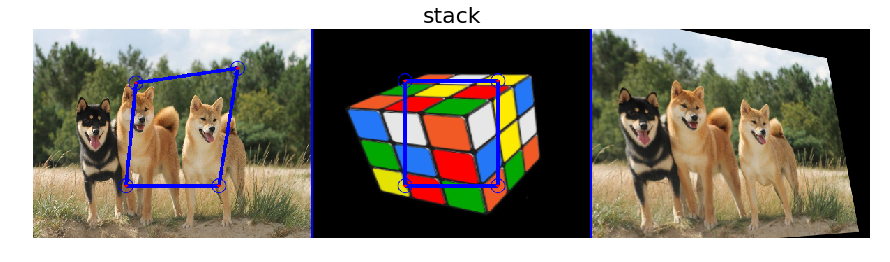

In [9]:
OpCV_Utils.show_single_image_plt(cv2.cvtColor(stack, cv2.COLOR_BGR2RGB), 'stack', fig_size = (15, 15))